In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport model.dntm.MemoryReadingsStats, visualization.MemoryReadingsPlot

In [5]:
import pandas as pd
import seaborn as sns

from hydra import compose, initialize
from model.dntm.MemoryReadingsStats import MemoryReadingsStats
from visualization.MemoryReadingsPlot import MemoryReadingsPlot

In [6]:
initialize(config_path="../conf/local", job_name="visualize_mem_readings")
cfg = compose(config_name="train_smnist")

/tmp/ipykernel_12162/351487158.py:1: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../conf/local", job_name="visualize_mem_readings")


In [20]:
cfg.run.project_path = '/home/fpetruzzellis/Progetti/seq-mnist'

In [8]:
! ls ../data/interim/memory_readings/

2022-07-05		 pmnist-var-2022-08-25_tmp  smnist-var-2022-08-22
pmnist-2022-07-09-18-14  smnist-2022-07-09-09-21
pmnist-2022-07-14_07-33  smnist-2022-07-19-17-35


In [16]:
EPOCH = 22
PATH = "../data/interim/memory_readings/smnist-2022-07-09-09-21"

In [10]:
EPOCH = 18
PATH = "../data/interim/memory_readings/pmnist-2022-07-09-18-14"

In [11]:
OVERALL_MEMORY_SIZE = 16

In [12]:
memory_reading_stats = MemoryReadingsStats(path=PATH)

In [13]:
memory_reading_stats.init_random_matrix(OVERALL_MEMORY_SIZE)
memory_reading_stats.load_memory_readings(EPOCH)
memory_reading_stats.compute_stats()

In [14]:
memory_readings_df = pd.DataFrame(
    memory_reading_stats.memory_readings.mean(dim=1).numpy(), columns=["mean"]
)
memory_readings_df["variance"] = pd.Series(
    memory_reading_stats.memory_readings.std(dim=1)
)
memory_readings_df["mem_location"] = pd.Series(range(OVERALL_MEMORY_SIZE))

In [22]:
memory_readings_plot = MemoryReadingsPlot(cfg, memory_readings_df)

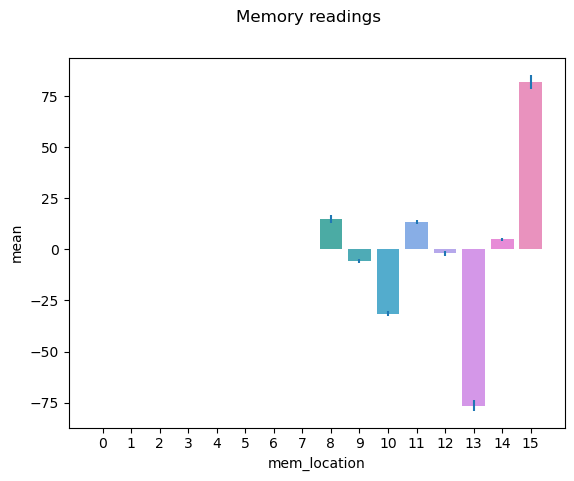

In [24]:
memory_readings_plot.plot(PATH.split("/")[-1] + "_mem_readings")

In [30]:
import matplotlib.pyplot as plt

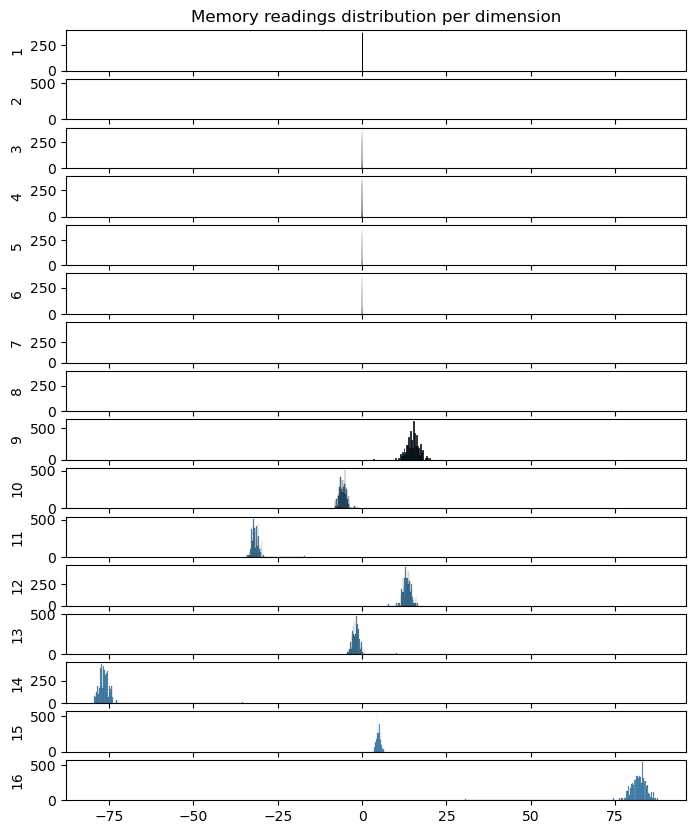

In [50]:
fig, axs = plt.subplots(16,1, figsize=(8,10), sharex=True)
for i, ax in enumerate(axs):
    axes_subplot = sns.histplot(memory_reading_stats.memory_readings[i].numpy(), ax=ax)
    axes_subplot.set(ylabel=i+1)
    if i==0: axes_subplot.set(title='Memory readings distribution per dimension')

## Projections

In [85]:
memory_reading_stats.init_random_matrix(OVERALL_MEMORY_SIZE)

Is the matrix (approximately) orthonormal?

<AxesSubplot:>

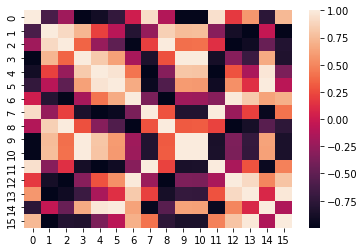

In [86]:
_ = sns.heatmap(
    memory_reading_stats.random_matrix @ memory_reading_stats.random_matrix.T
)

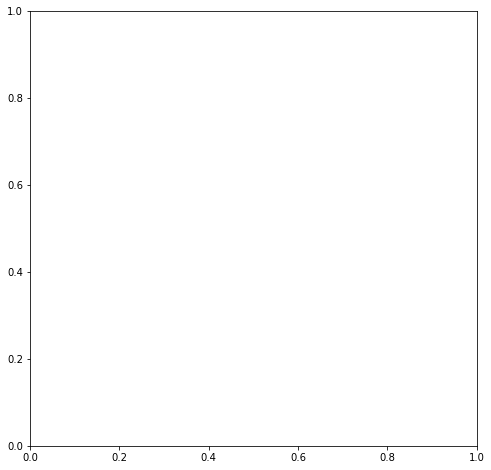

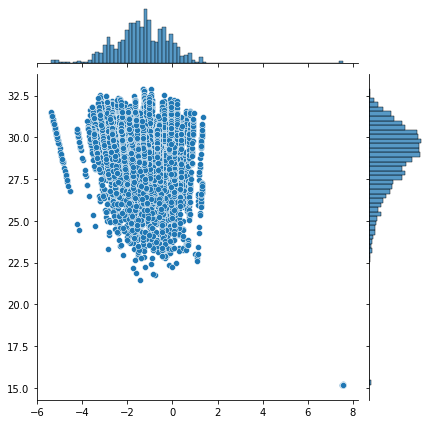

In [87]:
memory_reading_stats.plot_random_projections()